#JPX STOCK Prediction Explaratory Data Analysis


How to get setup up and running: 
1. run 'jupyter-lab' in the command line
2. open another shell and cd to working directory
3. git status to check if there are pending updates
4. git add . (learn to use other 'adds' and 'gitignore')
5. git commit -m "type a message here"
6. git push

##Importing libraries and packages

In [2]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

##Loading the data

The data for this competition is too big to be updated on Github.
We will store the data in a separate directory in the parent folder 

I ended up copying the information into this folder then using .gitignore to avoid publishing data into github

In [3]:
#Import train & test data & more
stock_list = pd.read_csv('data/stock_list.csv')
df_financials = pd.read_csv('data/train_files/financials.csv')
df_options = pd.read_csv('data/train_files/options.csv')
df_secondary_stock_prices = pd.read_csv('data/train_files/secondary_stock_prices.csv')
df_stock_prices = pd.read_csv('data/train_files/stock_prices.csv')
df_trades = pd.read_csv('data/train_files/trades.csv')

##Adding head and missing table values for the stock_list

In [4]:
stock_list.head(5)

,SecuritiesCode,EffectiveDate,Name,Section/Products,NewMarketSegment,33SectorCode,33SectorName,17SectorCode,17SectorName,NewIndexSeriesSizeCode,NewIndexSeriesSize,TradeDate,Close,IssuedShares,MarketCapitalization,Universe0
0,1301,20211230,"KYOKUYO CO.,LTD.",First Section (Domestic),Prime Market,50,"Fishery, Agriculture and Forestry",1,FOODS,7,TOPIX Small 2,20211230.0,3080.0,1.092828e+07,3.365911e+10,True
1,1305,20211230,Daiwa ETF-TOPIX,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2097.0,3.634636e+09,7.621831e+12,False
2,1306,20211230,NEXT FUNDS TOPIX Exchange Traded Fund,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2073.5,7.917718e+09,1.641739e+13,False
3,1308,20211230,Nikko Exchange Traded Index Fund TOPIX,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2053.0,3.736943e+09,7.671945e+12,False
4,1309,20211230,NEXT FUNDS ChinaAMC SSE50 Index Exchange Trade...,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,44280.0,7.263200e+04,3.216145e+09,False


##Outputting head(15) of the training data -- 
Still in phase of understanding what everything means

<AxesSubplot:>

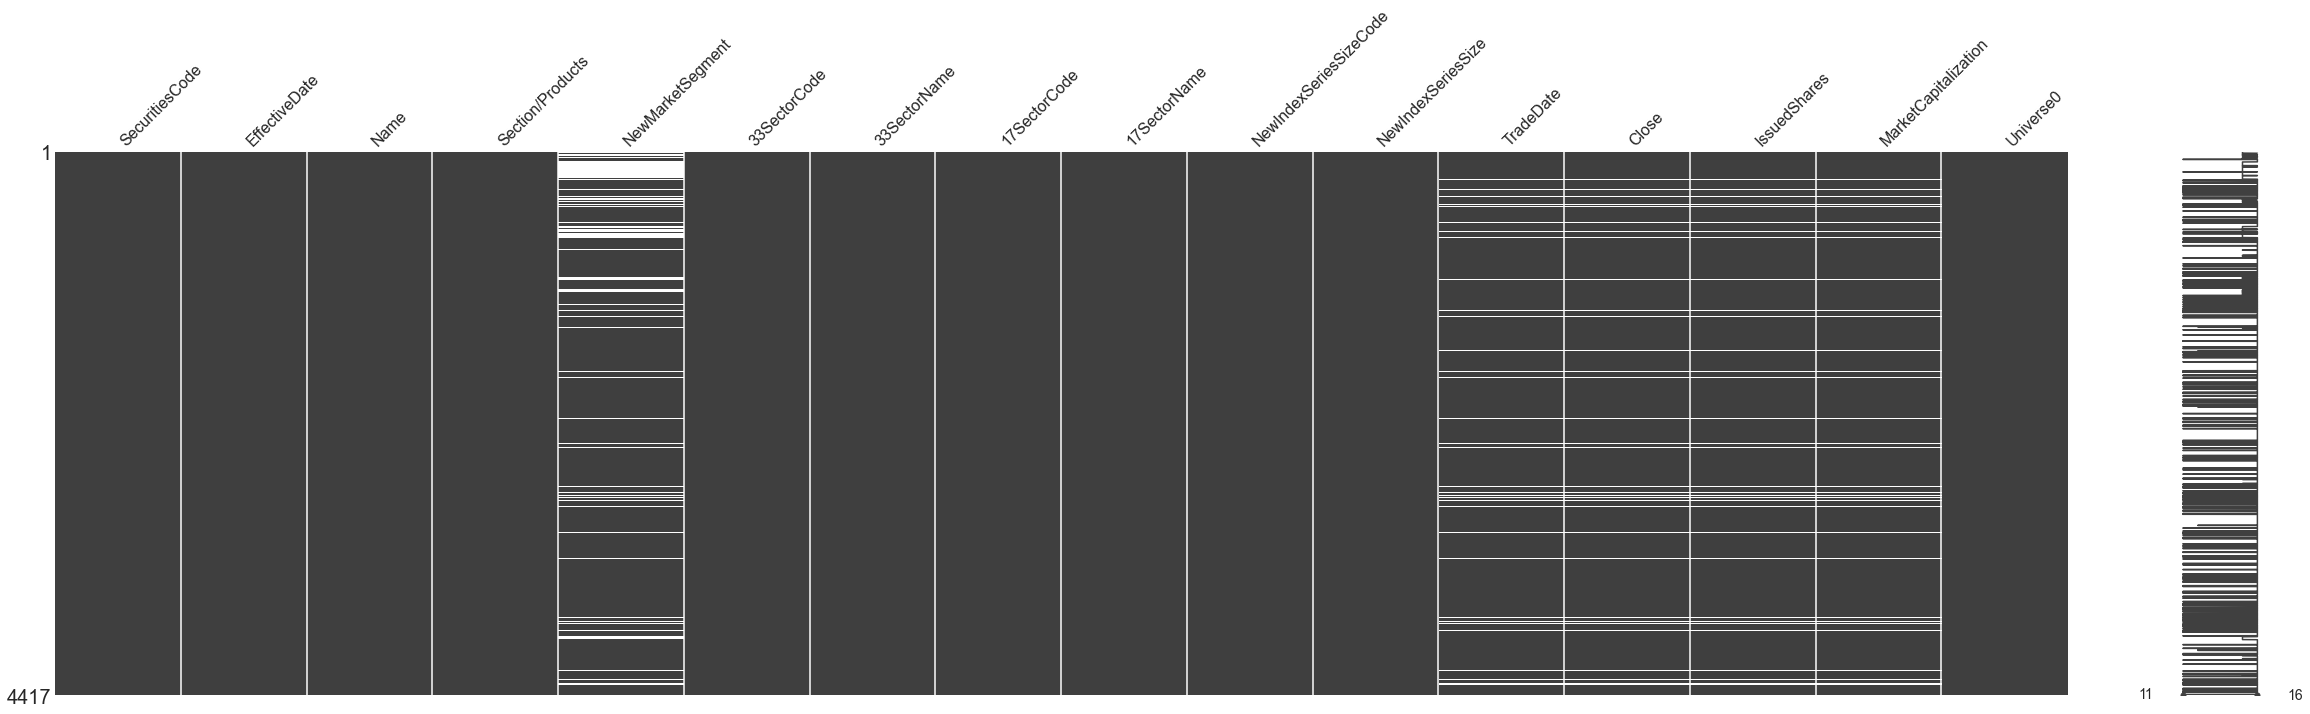

In [5]:
# Plot graphic of missing values
missingno.matrix(stock_list, figsize = (40,10))

In [6]:
# Another way of checking how many missing values are in a dataset
stock_list.isnull().sum()

SecuritiesCode              0
EffectiveDate               0
Name                        0
Section/Products            0
NewMarketSegment          645
33SectorCode                0
33SectorName                0
17SectorCode                0
17SectorName                0
NewIndexSeriesSizeCode      0
NewIndexSeriesSize          0
TradeDate                 296
Close                     296
IssuedShares              296
MarketCapitalization      296
Universe0                   0
dtype: int64

In [7]:
#df_stock_prices.head(5)
df_stock_prices.describe()

,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,Target
count,2.332531e+06,2.324923e+06,2.324923e+06,2.324923e+06,2.324923e+06,2.332531e+06,2.332531e+06,18865.000000,2.332293e+06
mean,5.894835e+03,2.594511e+03,2.626540e+03,2.561227e+03,2.594023e+03,6.919366e+05,1.000508e+00,22.017730,4.450964e-04
std,2.404161e+03,3.577192e+03,3.619363e+03,3.533494e+03,3.576538e+03,3.911256e+06,6.773040e-02,29.882453,2.339879e-02
min,1.301000e+03,1.400000e+01,1.500000e+01,1.300000e+01,1.400000e+01,0.000000e+00,1.000000e-01,0.000000,-5.785414e-01
25%,3.891000e+03,1.022000e+03,1.035000e+03,1.009000e+03,1.022000e+03,3.030000e+04,1.000000e+00,5.000000,-1.049869e-02
50%,6.238000e+03,1.812000e+03,1.834000e+03,1.790000e+03,1.811000e+03,1.071000e+05,1.000000e+00,15.000000,0.000000e+00
75%,7.965000e+03,3.030000e+03,3.070000e+03,2.995000e+03,3.030000e+03,4.021000e+05,1.000000e+00,30.000000,1.053159e-02
max,9.997000e+03,1.099500e+05,1.105000e+05,1.072000e+05,1.095500e+05,6.436540e+08,2.000000e+01,1070.000000,1.119512e+00


<AxesSubplot:>

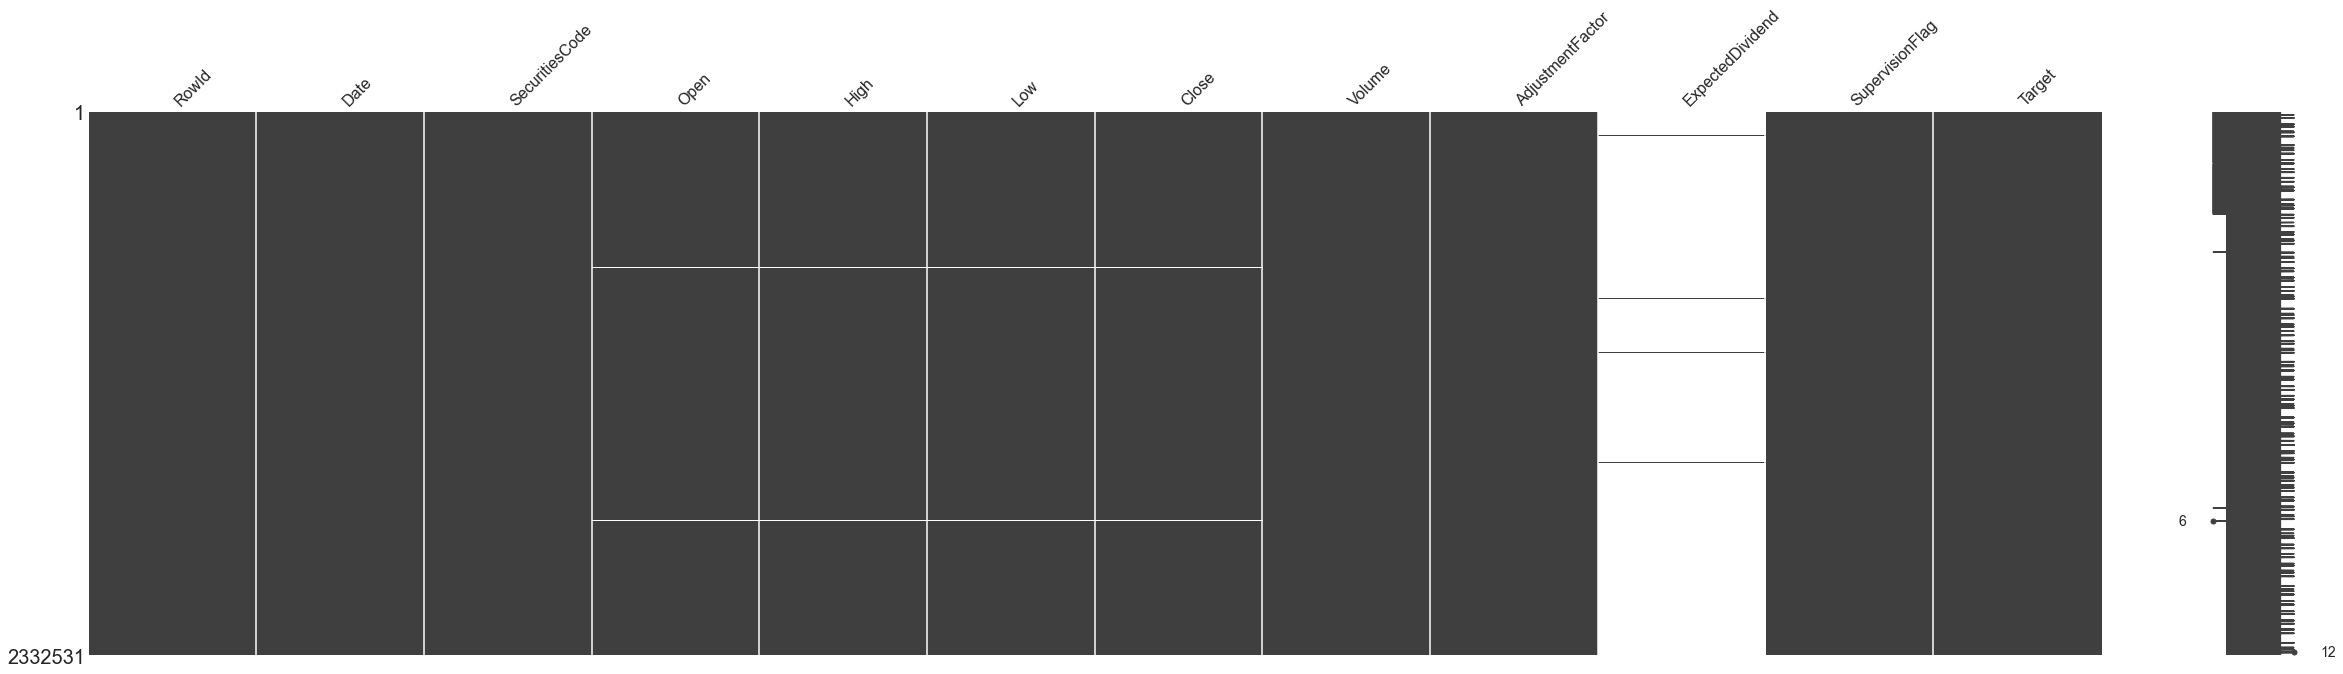

In [8]:
# Plot graphic of missing values
missingno.matrix(df_stock_prices, figsize = (40,10))

In [9]:
# Another way of checking how many missing values are in a dataset
df_stock_prices.isnull().sum()

RowId                     0
Date                      0
SecuritiesCode            0
Open                   7608
High                   7608
Low                    7608
Close                  7608
Volume                    0
AdjustmentFactor          0
ExpectedDividend    2313666
SupervisionFlag           0
Target                  238
dtype: int64

##Notice
There are a lot of missing values in the ExpectedDividend column, therefore we cannot make an accurate judgment with it as a variable during training
##To-do
Figure out why there are 7608 stocks without OPEN/HIGH/LOW columns (assuming they are common)
Write a program that groups these stocks together and try to find a pattern

In [10]:
df_trades.head(5)

,Date,StartDate,EndDate,Section,TotalSales,TotalPurchases,TotalTotal,TotalBalance,ProprietarySales,ProprietaryPurchases,...,CityBKsRegionalBKsEtcTotal,CityBKsRegionalBKsEtcBalance,TrustBanksSales,TrustBanksPurchases,TrustBanksTotal,TrustBanksBalance,OtherFinancialInstitutionsSales,OtherFinancialInstitutionsPurchases,OtherFinancialInstitutionsTotal,OtherFinancialInstitutionsBalance
0,2017-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_secondary_stock_prices.head(5)

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20170104_1305,2017-01-04,1305,1594.0,1618.0,1594.0,1615.0,538190,1.0,NaN,False,-0.001855
1,20170104_1306,2017-01-04,1306,1575.0,1595.0,1573.0,1593.0,2494980,1.0,NaN,False,-0.000627
2,20170104_1308,2017-01-04,1308,1557.0,1580.0,1557.0,1578.0,526100,1.0,NaN,False,-0.001900
3,20170104_1309,2017-01-04,1309,28810.0,29000.0,28520.0,28780.0,403,1.0,NaN,False,0.005237
4,20170104_1311,2017-01-04,1311,717.0,735.0,717.0,734.0,5470,1.0,NaN,False,0.001359


In [12]:
df_options.head(5)

,DateCode,Date,OptionsCode,WholeDayOpen,WholeDayHigh,WholeDayLow,WholeDayClose,NightSessionOpen,NightSessionHigh,NightSessionLow,...,Putcall,LastTradingDay,SpecialQuotationDay,SettlementPrice,TheoreticalPrice,BaseVolatility,ImpliedVolatility,InterestRate,DividendRate,Dividend
0,20170104_132010018,2017-01-04,132010018,650.0,650.0,480.0,480.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,480.0,478.4587,17.4736,17.5865,0.0091,0.0,0.0
1,20170104_132010118,2017-01-04,132010118,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,575.0,571.1385,17.4736,16.5000,0.0091,0.0,0.0
2,20170104_132010218,2017-01-04,132010218,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,680.0,677.3710,17.4736,15.8644,0.0091,0.0,0.0
3,20170104_132010318,2017-01-04,132010318,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,795.0,791.0383,17.4736,15.2288,0.0091,0.0,0.0
4,20170104_132010518,2017-01-04,132010518,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,910.0,909.9947,17.4736,14.5932,0.0091,0.0,0.0


## Understanding the data
Read from the data_specification sub-folder. Trying to summarize the definition of each specific column for understanding and future reference

### Options specifications
What is night session? 
https://www.jpx.co.jp/english/derivatives/rules/trading-hours/index.html

The Japanese market operates a night session for different options/futures to allow trade between overseas market (US, Europe) 

Whole & Day & Night / Low & High & Close & Open - all floats

### Stock_List specifications


## Understanding the scoring system

The first 200 stocks and the last 200 out of a list of 2000 will be bought and shorted, respectively.

The sum of the first 200 stocks will be saved into a variable called S_{up}. The ranking of the stock will determine its linear weight which goes from 2-to-1.
This means that the first stock has a weight of 2 and the 200th a weight of 1. This allows competitors with the highest return on stock that were ranked high to get a greater S_{up} value.

The same process is done for the last 200 stocks (shorted) and stored into a variable called S_{down}.
The final score of the competitors is then simply S_{up}-S{down}.

Practicing outputs for data. 

RowId               1202
Date                1202
SecuritiesCode      1202
Open                1201
High                1201
Low                 1201
Close               1201
Volume              1202
AdjustmentFactor    1202
ExpectedDividend      10
SupervisionFlag     1202
Target              1202
dtype: int64


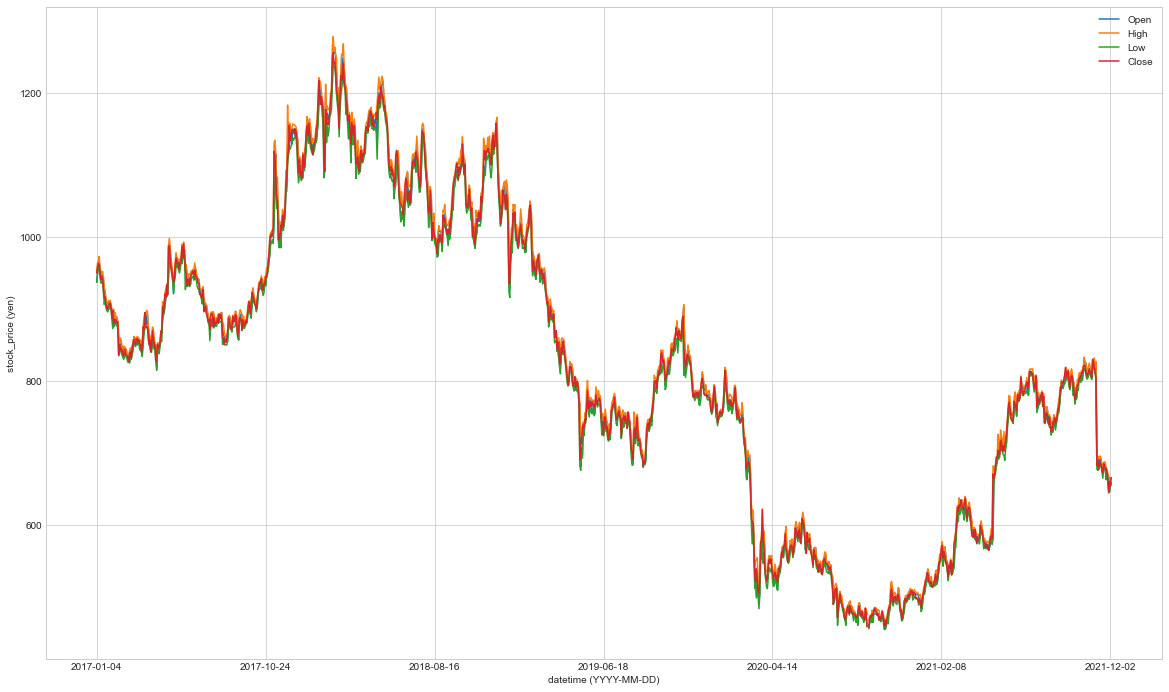

In [16]:
code = 1720
price_data = df_stock_prices[df_stock_prices["SecuritiesCode"] == code]
print(price_data.count())

fig, ax = plt.subplots(figsize=(20, 12))

ax.plot(price_data['Date'],price_data["Open"], label=f"Open")
ax.plot(price_data['Date'],price_data["High"], label=f"High")
ax.plot(price_data['Date'],price_data["Low"], label=f"Low")
ax.plot(price_data['Date'],price_data["Close"], label=f"Close")
plt.xticks([0, 200, 400, 600, 800, 1000, 1200])
ax.set_ylabel("stock_price (yen)")
ax.set_xlabel("datetime (YYYY-MM-DD)")
ax.grid(True)
ax.legend()
